<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Model_WithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


The labels and Features files for the model have been listed in the repository to be included here. 

In [0]:
 
with open('/content/labelsFinal_withprevpm.bin','rb') as file:
  labels = pickle.load(file)
  
with open('/content/featuresFinal_withprevpm.bin','rb') as file:
  features = pickle.load(file)

In [0]:
x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
tf.reset_default_graph()


In [5]:
print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17128103730301002164
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1388153605367717769
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2538875807017497611
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11189410202
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1101547174280932497
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [6]:

from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(15, input_shape = (10, ), activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1,  activation = 'relu'))

Using TensorFlow backend.
W0830 17:45:09.633952 139711710766976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 17:45:09.638928 139711710766976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 17:45:09.642008 139711710766976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:

model.compile(optimizer = Adam(lr = 0.001),loss='mse')
model.summary()

W0830 17:45:09.716118 139711710766976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                400       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist = model.fit([x_train_t], [y_train_t], validation_split = 0.33, epochs = 1400,verbose = 1, batch_size = 32, shuffle = True)

W0830 17:45:11.721405 139711710766976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0830 17:45:11.820966 139711710766976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1158 samples, validate on 571 samples
Epoch 1/1400
1158/1158 [==============================] - 1s 907us/step - loss: 3487.4776 - val_loss: 3155.5235
Epoch 2/1400
1158/1158 [==============================] - 0s 155us/step - loss: 3272.5535 - val_loss: 2867.7414
Epoch 3/1400
1158/1158 [==============================] - 0s 162us/step - loss: 2866.0698 - val_loss: 2321.4404
Epoch 4/1400
1158/1158 [==============================] - 0s 154us/step - loss: 2175.6654 - val_loss: 1493.5687
Epoch 5/1400
1158/1158 [==============================] - 0s 175us/step - loss: 1356.3473 - val_loss: 815.6367
Epoch 6/1400
1158/1158 [==============================] - 0s 159us/step - loss: 916.1756 - val_loss: 644.4339
Epoch 7/1400
1158/1158 [==============================] - 0s 183us/step - loss: 842.3950 - val_loss: 630.6178
Epoch 8/1400
1158/1158 [==============================] - 0s 179us/step - loss: 827.3140 - val_loss: 621.1492
Epoch 9/1400
1158/1158 [==============================] - 0s 212

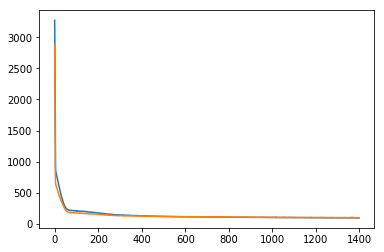

In [9]:
##Plotting the learning curve 

tr = hist.history['loss']
val_ls = hist.history['val_loss']
plt.plot(tr[1:])
plt.plot(val_ls[1:])

In [10]:
##Estimating the Root Mean Square Error of the Model - A metric of its performance

predicted = model.predict([x_test_t])
y_test_t=np.reshape(y_test_t, (np.shape(y_test_t)[0],1))

actual =[]
pred=[]
se=0
show = np.hstack((y_test_t, predicted))

for i in show:
  se+=(i[0]-i[1])**2
  actual.append(i[0])
  pred.append(i[1])
  
rmse = (se/np.size(y_test_t))**0.5
print(rmse)

10.73650898891647


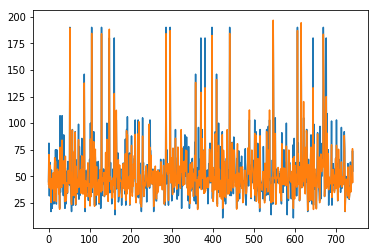

In [11]:
plt.plot(actual)
plt.plot(pred)